<a href="https://colab.research.google.com/github/Ravi19911992/ML_services/blob/master/Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Setting up SQLLite database and Reddit API client
# Importing PRAW and SQLITE3 Libraries
!pip install PRAW

In [ ]:
!pip install pysqlite3

  Using cached https://files.pythonhosted.org/packages/ca/e4/38f120cb2277b7931503ad5fe371a66fe780508f79b3793e3775f7fd819e/pysqlite3-0.4.3.tar.gz
  Command arguments: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-x3ez7nd7/pysqlite3/setup.py'"'"'; __file__='"'"'/tmp/pip-install-x3ez7nd7/pysqlite3/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-m9fl1qpk --python-tag cp36
  Command output:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.6
  creating build/lib.linux-x86_64-3.6/pysqlite3
  copying pysqlite3/__init__.py -> build/lib.linux-x86_64-3.6/pysqlite3
  copying pysqlite3/dbapi2.py -> build/lib.linux-x86_64-3.6/pysqlite3
  running build_ext
  Builds a C extension linking against libsqlite3 library
  building 'pysqlite3._sql

In [ ]:
import praw
import sqlite3

In [ ]:
# Set up connection to SQLite database 
conn = sqlite3.connect('reddit.db')
c= conn.cursor()

In [ ]:
#Execute SQL statements to create topics and comments table
c.execute('''DROP TABLE IF EXISTS topics''')
c.execute('''DROP TABLE IF EXISTS comments''')
c.execute('''CREATE TABLE topics
             (topicTitle text, topicText text, topicID text, topicCategory text)''')
c.execute('''CREATE TABLE comments
             (commentText text, commentID text, topicTitle text, topicText text, topicID text, topicCategory text)''')

In [ ]:
# Creating PRAW user agent so we can use Reddit API
user_agent = 'Introducing Data Science Book'
r = praw.Reddit(user_agent = user_agent, client_id= 'N6yUGyyHAd4ouw', client_secret='egSDy7Ga83MxslmBYXWZ_PNofNw')

In [ ]:
# List of subreddits we'll draw into SQLite database
subreddits = ['datascience', 'gameofthrones']

In [ ]:
#Max number of posts we fetch from Reddit per category
limit=1000

In [ ]:
%%time

#Reddit Data retieval and storage in SQLite
def prawGetData(limit, subredditName):
    topics = r.subreddit(subredditName).hot(limit=limit)
    commentInsert =[]
    topicInsert = []
    topicNBR=1
    for topic in topics:
        if (float(topicNBR)/limit)*100 in range(1,100):
            print ('********* TOPIC:' + str(topic.id) + ' ******COMPLETE: ' + str((float(topicNBR)/limit)*100) + ' % ****')
        topicNBR += 1
        try:
            topicInsert.append((topic.title, topic.selftext, topic.id, subredditName))
        except:
            pass
        try:
            for comment in topic.comments:
                commentInsert.append((comment.body,comment.id, topic.title.topic.selftext, topic.id, subredditName))
        except:
            pass
    print('***********************************')
    print('INSERTING DATA INTO SQLITE')
    c.executemany('INSERT INTO topics VALUES (?,?,?,?)', topicInsert)
    print('INSERTED TOPICS')
    c.executemany('INSERT INTO comments VALUES (?,?,?,?,?,?)', commentInsert)
    print('INSERTED COMMENTS')
    conn.commit()
    
for subject in subreddits:
    prawGetData(limit=limit, subredditName=subject)

********* TOPIC:hrr9q9 ******COMPLETE: 1.0 % ****
********* TOPIC:hrazsq ******COMPLETE: 2.0 % ****
********* TOPIC:hqjsxp ******COMPLETE: 3.0 % ****
********* TOPIC:hpf2zb ******COMPLETE: 4.0 % ****
********* TOPIC:hop5xd ******COMPLETE: 5.0 % ****
********* TOPIC:hnmu71 ******COMPLETE: 6.0 % ****
********* TOPIC:hmhg9v ******COMPLETE: 8.0 % ****
********* TOPIC:hlxnqg ******COMPLETE: 9.0 % ****
********* TOPIC:hl7w3p ******COMPLETE: 10.0 % ****
********* TOPIC:hkbjlj ******COMPLETE: 11.0 % ****
********* TOPIC:hjy0u0 ******COMPLETE: 12.0 % ****
********* TOPIC:hjokfq ******COMPLETE: 13.0 % ****
********* TOPIC:hi7m46 ******COMPLETE: 15.0 % ****
********* TOPIC:hho725 ******COMPLETE: 16.0 % ****
********* TOPIC:hgfzws ******COMPLETE: 17.0 % ****
********* TOPIC:hg27ht ******COMPLETE: 18.0 % ****
********* TOPIC:heyi95 ******COMPLETE: 19.0 % ****
********* TOPIC:he41c8 ******COMPLETE: 20.0 % ****
********* TOPIC:hdip81 ******COMPLETE: 21.0 % ****
********* TOPIC:hdgzaw ******COMPLETE: 

In [ ]:
#Import all required Libraries

import sqlite3
import nltk
import matplotlib.pyplot as plt
from collections import OrderedDict
import random

nltk.download('punkt')
nltk.download('stopwords')

# Make a connection to SQLite database that contains our Reddit data
conn = sqlite3.connect('reddit.db')
c= conn.cursor()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Wordfiltering and lowercasing functions. Wordfilter function will remove a term from array of terms
def wordFilter(excluded, wordrow):
    filtered = [word for word in wordrow if word not in excluded]
    return filtered
stopwords = nltk.corpus.stopwords.words('english')
def lowercaseArray(wordrow):
    lowercased = [word.lower() for word in wordrow]
    return lowercased

In [ ]:
#stopwords

stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Data Preparation and execution
def data_processing(sql):
    c.execute(sql) # create pointer to AWLite Data
    data = {'wordMatrix' : [], 'all_words' : []}
    row = c.fetchone() # Fetch Data row by row
    while row is not None:
        wordrow = nltk.tokenize.word_tokenize(row[0] + " " + row[1]) #row[0] is title, row[1] is topic text
        wordrow_lowercased = lowercaseArray(wordrow)
        wordrow_nostopwords = wordFilter(stopwords, wordrow_lowercased)
        data['all_words'].extend(wordrow_nostopwords)
        data['wordMatrix'].append(wordrow_nostopwords) # comprised of word vectors, 1 vector per document
        row = c.fetchone() # Get new document to SQLite
    return data

subreddits = ['datascience', 'gameofthrones']
data = {}
for subject in subreddits:
    data[subject] = data_processing(sql ='''SELECT topicTitle, topicText, topicCategory FROM topics WHERE topicCategory= ''' + "'" + subject + "'")

In [ ]:
print(data['datascience']['wordMatrix'][0])

['weekly', 'entering', '&', 'transitioning', 'thread', '|', '12', 'jul', '2020', '-', '19', 'jul', '2020', 'welcome', 'week', "'s", 'entering', '&', 'transitioning', 'thread', '!', 'thread', 'questions', 'getting', 'started', ',', 'studying', ',', 'transitioning', 'data', 'science', 'field', '.', 'topics', 'include', ':', '*', 'learning', 'resources', '(', 'e.g', '.', 'books', ',', 'tutorials', ',', 'videos', ')', '*', 'traditional', 'education', '(', 'e.g', '.', 'schools', ',', 'degrees', ',', 'electives', ')', '*', 'alternative', 'education', '(', 'e.g', '.', 'online', 'courses', ',', 'bootcamps', ')', '*', 'job', 'search', 'questions', '(', 'e.g', '.', 'resumes', ',', 'applying', ',', 'career', 'prospects', ')', '*', 'elementary', 'questions', '(', 'e.g', '.', 'start', ',', 'next', ')', 'wait', 'answers', 'community', ',', 'check', '[', 'faq', ']', '(', 'https', ':', '//www.reddit.com/r/datascience/wiki/frequently-asked-questions', ')', '[', 'resources', ']', '(', 'resources', ')', 

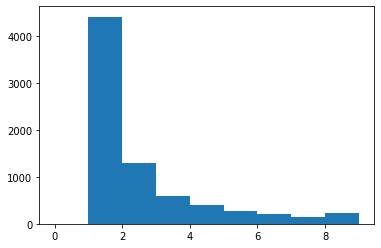

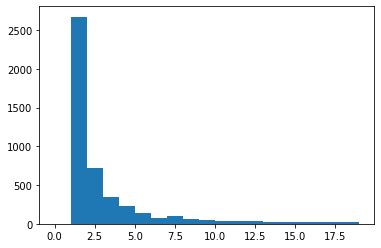

In [ ]:
#Frequenncy Distribution
wordfreqs_cat1 = nltk.FreqDist(data['datascience']['all_words'])
plt.hist(wordfreqs_cat1.values(), bins = range(10))
plt.show()
wordfreqs_cat2 = nltk.FreqDist(data['gameofthrones']['all_words'])
plt.hist(wordfreqs_cat2.values(), bins = range(20))
plt.show()

In [ ]:
# Single-occurrence terms such as these are called hapaxes, and model-wise they’re useless because a single occurrence of a feature is never enough to build a reliable model.
print(wordfreqs_cat1.hapaxes())
print(wordfreqs_cat2.hapaxes())

['non-deep', 'xgb', 'tree/flow', '//www.pnrjournal.com/viewimage.asp', 'img=jpharmnegativeresults_2010_1_2_61_75708_f1.jpg', 'guest', 'downhill', 'granular', 'authority', 'tonne', 'corrected', 'whilst', 'conflicting', 'easiest', 'golden', 'algos', 'reliant', 'blunt', 'career/skill', 'undertake', 'procurement', 'requesting', 'open-ended', '**any**', 'bigrams/trigrams', 'lemmatizing', 'sustainable', 'distinct', 'headers', '`import', 'pd', 'warnings', 'language_check', 'spacy', 'nltk', 'sent_tokenize', 'nltk.tokenize', 'gensim', 'gensim.corpora', 'language_check.languagetool', "'en-us", 'spacy.load', 'en_core_web_sm', 'warnings.filterwarnings', 'word.translate', 'str.maketrans', '.replace', 'tool.check', 'm.category', "'redundant", "'capitalization", "'redundancy", "'plain", 'm.locqualityissuetype', "'style", "'uncategorized", 'm.ruleid', "='morfologik_rule_en_us", 'm.msg', "='possible", 'spelling', 'm.replacements', 'tool.correct', 'language_check.correct', 'token.lower_', '.isnumeric', 

In [ ]:
print(wordfreqs_cat1.most_common(20))
print(wordfreqs_cat2.most_common(20))

[('.', 3786), (',', 3672), ('?', 1428), ('data', 1409), (')', 1095), ('(', 1033), (':', 658), ('science', 446), ("'m", 418), ('*', 398), ("n't", 377), ("'s", 368), ('like', 353), ('would', 348), ('’', 347), ('work', 345), ("''", 275), ('&', 274), ('``', 268), ('time', 254)]
[('.', 1635), (',', 1122), ('[', 624), (']', 624), ('spoilers', 563), ('?', 440), ('’', 301), (')', 272), ('(', 249), (':', 247), ("'s", 231), ('season', 208), ('show', 187), ('game', 178), ('would', 169), ('thrones', 167), ('one', 152), ('got', 146), ('king', 142), ('jon', 141)]


In [ ]:
# Data Reddit Processing revised after data exploration
#Intializes stemmer from NLTK Library
stemmer = nltk.SnowballStemmer("english")
def wordStemmer(wordrow):
  stemmed = [stemmer.stem(word) for word in wordrow]
  return stemmed

manual_stopwords = [',','.',')',',','(','m',"'m","n't",'e.g',"'ve",'s','#','/','``',"'s","''",'!','r',']','=','[','s','&','%','*','...','1','2','3','4','5','6','7','8','9','10','--',"''",';','-',':']

#defining revised data preparation
def data_processing(sql, manual_stopwords):
  #create pointer to sqlite data
  c.execute(sql)
  data={'wordMatrix':[], 'all_words':[] }
  interWordMatrix = []
  interWordList = []

#fetch data(reddit posts) one by one from SQLite database
  row = c.fetchone()
  while row is not None:
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+|[^\w\s]+')
    wordrow = tokenizer.tokenize(row[0]+" "+row[1])
    wordrow_lowercased = lowercaseArray(wordrow)
    wordrow_nostopwords = wordFilter(stopwords,wordrow_lowercased)
    wordrow_nostopwords = wordFilter(manual_stopwords, wordrow_nostopwords) #Remove manually added stopwords
    wordrow_stemmed = wordStemmer(wordrow_nostopwords)

    interWordList.extend(wordrow_stemmed)
    interWordMatrix.append(wordrow_stemmed)

    row = c.fetchone()

# Make frequency distribution of all terms
  wordfreqs = nltk.FreqDist(interWordList)
  hapaxes = wordfreqs.hapaxes()
  #loop through temporary wordmatrix
  for wordvector in interWordMatrix:
    wordvector_nohapaxes = wordFilter(hapaxes, wordvector) # remove hapaxes in each word vector
    data['wordMatrix'].append(wordvector_nohapaxes)
    data['all_words'].extend(wordvector_nohapaxes) #extend list of all terms with corrected word vector

  return data

# Running new data processing function for both subreddits
for subject in subreddits:
  data[subject] = data_processing(sql ='''SELECT topicTitle, topicText, topicCategory FROM topics WHERE topicCategory= ''' + "'" + subject + "'", manual_stopwords = manual_stopwords)

In [ ]:
wordfreqs_cat1 = nltk.FreqDist(data['datascience']['all_words'])
print(wordfreqs_cat1.most_common(20))

[("'", 1574), ('data', 1458), ('?', 1304), ('work', 580), ('use', 536), ('scienc', 472), ('like', 399), ('"', 384), ('’', 345), ('model', 344), ('get', 342), ('learn', 340), ('would', 339), ('time', 311), ('job', 279), ('compani', 271), ('scientist', 260), ('project', 246), ('know', 240), ('question', 229)]


In [ ]:
wordfreqs_cat2 = nltk.FreqDist(data['gameofthrones']['all_words'])
print(wordfreqs_cat2.most_common(20))

[('spoiler', 588), ("'", 524), ('?', 367), ('’', 297), ('season', 258), ('throne', 214), ('show', 213), ('game', 185), ('\\', 170), ('king', 168), ('poll', 164), ('would', 163), ('one', 159), ('got', 145), ('jon', 143), ('like', 142), ('think', 141), ('watch', 140), ('book', 139), ('battl', 133)]


In [ ]:
# Holdout set is comprised of unlabeled data from two subreddits: 100 observations from each data set

holdoutLength = 100
#Creating a single dataset with every word vector tagged as being either 'datascience' or 'gameofthrones'. We keep part of the data aside for holdout sample
labeled_data1 = [(word, 'datascience') for word in data['datascience']['wordMatrix'][holdoutLength:]]
labeled_data2 = [(word, 'gameofthrones') for word in data['gameofthrones']['wordMatrix'][holdoutLength:]]
labeled_data = []
labeled_data.extend(labeled_data1)
labeled_data.extend(labeled_data2)
#holout sample comprised of unlabeled data from two subreddits: 100 observations from each data set. The labels are kept in seperate data set.
holdout_data = data['datascience']['wordMatrix'][:holdoutLength]
holdout_data.extend(data['gameofthrones']['wordMatrix'][:holdoutLength])
holdout_data_labels = ([('datascience') for _ in range(holdoutLength)] + [('gameofthrones') for _ in range(holdoutLength)])

data['datascience']['all_words_dedup'] = list(OrderedDict.fromkeys(data['datascience']['all_words']))
data['gameofthrones']['all_words_dedup'] = list(OrderedDict.fromkeys(data['gameofthrones']['all_words']))
all_words=[]
all_words.extend(data['datascience']['all_words_dedup'])
all_words.extend(data['gameofthrones']['all_words_dedup'])
all_words_dedup = list(OrderedDict.fromkeys(all_words))
#data is turned into a binary bag of words format
prepared_data = [({word: (word in x[0]) for word in all_words_dedup}, x[1]) for x in labeled_data]
prepared_holdout_data = [({word: (word in x[0]) for word in all_words_dedup}) for x in holdout_data]

random.shuffle(prepared_data) #data for model training and testing is shuffled
train_size = int(len(prepared_data) * 0.75) #training data is 75%
train = prepared_data[:train_size]
test = prepared_data[train_size:]

In [ ]:
print(prepared_data[0])

({'week': False, 'enter': False, 'transit': False, 'thread': False, '|': False, '12': False, 'jul': False, '2020': False, '19': False, 'welcom': False, "'": False, 'question': False, 'get': False, 'start': False, 'studi': False, 'data': False, 'scienc': False, 'field': False, 'topic': False, 'includ': False, 'learn': False, 'resourc': False, 'e': False, 'g': False, 'book': False, 'tutori': False, 'video': False, 'tradit': False, 'educ': False, 'school': False, 'degre': False, 'elect': False, 'altern': False, 'onlin': False, 'cours': False, 'bootcamp': False, 'job': False, 'search': False, 'resum': False, 'appli': False, 'career': False, 'prospect': False, 'elementari': False, 'next': False, 'wait': False, 'answer': False, 'communiti': False, 'check': False, 'faq': False, '](': False, 'https': False, '://': False, 'www': False, 'reddit': False, 'com': False, 'datasci': False, 'wiki': False, 'frequent': False, 'ask': False, 'page': False, 'also': False, 'past': False, '?': True, 'q': Fal

In [ ]:
#Training a Naive Bayes Classifier
classifier  = nltk.NaiveBayesClassifier.train(train)

In [ ]:
#determining the accuracy of the classifier
nltk.classify.accuracy(classifier, test)

0.946058091286307

In [ ]:
classified_data = classifier.classify_many(prepared_holdout_data)
cm = nltk.ConfusionMatrix(holdout_data_labels, classified_data)
print(cm)

              |       g |
              |       a |
              |   d   m |
              |   a   e |
              |   t   o |
              |   a   f |
              |   s   t |
              |   c   h |
              |   i   r |
              |   e   o |
              |   n   n |
              |   c   e |
              |   e   s |
--------------+---------+
  datascience |  <.>100 |
gameofthrones |   .<100>|
--------------+---------+
(row = reference; col = test)



In [ ]:
print(classifier.show_most_informative_features(20))

Most Informative Features
                 spoiler = False          datasc : gameof =    222.4 : 1.0
                   learn = True           datasc : gameof =     29.4 : 1.0
                 project = True           datasc : gameof =     28.4 : 1.0
                     job = True           datasc : gameof =     28.1 : 1.0
                    code = True           datasc : gameof =     27.8 : 1.0
                 charact = True           gameof : datasc =     26.7 : 1.0
                    busi = True           datasc : gameof =     25.5 : 1.0
                 process = True           datasc : gameof =     25.0 : 1.0
                 predict = True           datasc : gameof =     23.8 : 1.0
                 compani = True           datasc : gameof =     23.2 : 1.0
                    type = True           datasc : gameof =     19.2 : 1.0
                    work = True           datasc : gameof =     18.1 : 1.0
                    role = True           datasc : gameof =     16.9 : 1.0

In [ ]:
# Decision tree model training and evaluation

classifier2  = nltk.DecisionTreeClassifier.train(train)

In [ ]:
nltk.classify.accuracy(classifier2, test)

1.0

In [ ]:
classified_data = classifier2.classify_many(prepared_holdout_data)
cm = nltk.ConfusionMatrix(holdout_data_labels, classified_data)
print(cm)

              |       g |
              |       a |
              |   d   m |
              |   a   e |
              |   t   o |
              |   a   f |
              |   s   t |
              |   c   h |
              |   i   r |
              |   e   o |
              |   n   n |
              |   c   e |
              |   e   s |
--------------+---------+
  datascience |<100>  . |
gameofthrones |   .<100>|
--------------+---------+
(row = reference; col = test)



In [60]:
print(classifier2.pseudocode(depth=4))

if spoiler == False: return 'datascience'
if spoiler == True: return 'gameofthrones'

